In [89]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
repo_dir = os.path.dirname(os.getcwd())
os.path.join(repo_dir, "data", "processed", "train_data.npz")

'c:\\Users\\lorentsen\\Documents\\HPPC\\Assignment2\\data\\processed\\train_data.npz'

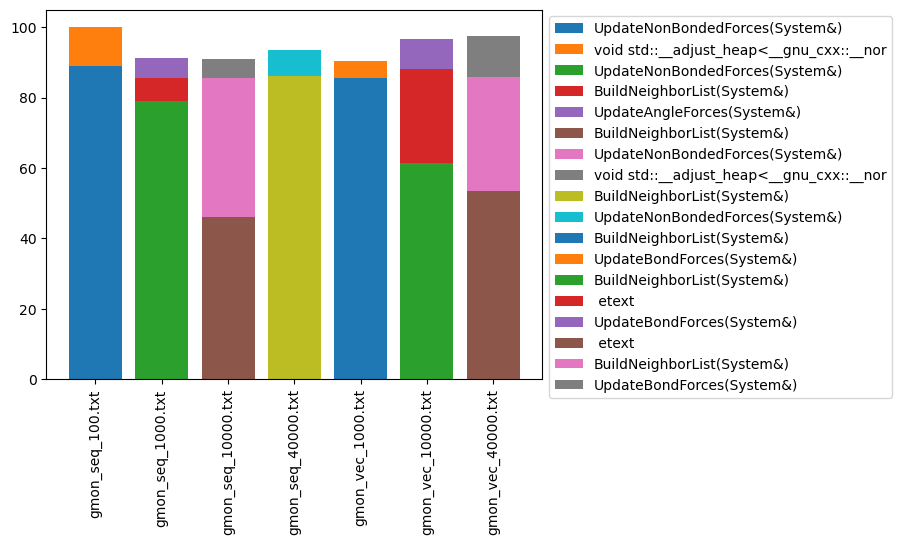

In [188]:
file_dir = os.path.join(repo_dir, '698afdbfe1df1f213974a0ea', 'GMON')
files = [f for f in os.listdir(file_dir) if f.removesuffix('.txt')[-2:] != "10"]

fig, ax = plt.subplots()

for file in files:
    # print(file)
    with open(os.path.join(file_dir, file)) as f:
        read_file = f.read()
    cols = [c for c in read_file.split('\n')[4].split(" ") if c != '']
    cols
    df = pd.DataFrame(columns=cols)

    i = 5
    rows = read_file.split('\n')
    while rows[i] != '':
        function = rows[i].split("  ")[-1]
        values = [float(v) for v in rows[i].split(" ") if v != '' and v.split(".")[0].isdigit()]
        if len(values) != len(cols):
            # print("Error: Length of values does not match length of columns")
            # print(f"Values: {values}")
            # print(f"Columns: {cols}")
            # i += 1
            # continue
            values += [np.nan]*(len(cols)-len(values)-1)
        values.append(function)
        # print(values)

        
        df.loc[len(df)] = values
        i += 1
    print()

    names = [n[:40] for n in df['name']]

    # plt.plot(names, df['time'])
    mask = df['time'].cumsum() < 90
    mask |= mask.shift(1, fill_value=False)
    df[mask]["time"]
    bottom = 0
    for height, name in zip(df[mask]["time"], df[mask]["name"]):
        ax.bar(file, height, label = name[:40], bottom=bottom)
        bottom += height
plt.xticks(rotation=90);
# os.listdir(file_dir)[0].removesuffix('.txt')[-2:]
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [204]:
dir(plt.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'ColormapRegistry',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Grays',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'Mapping',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '_LUTSIZE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '

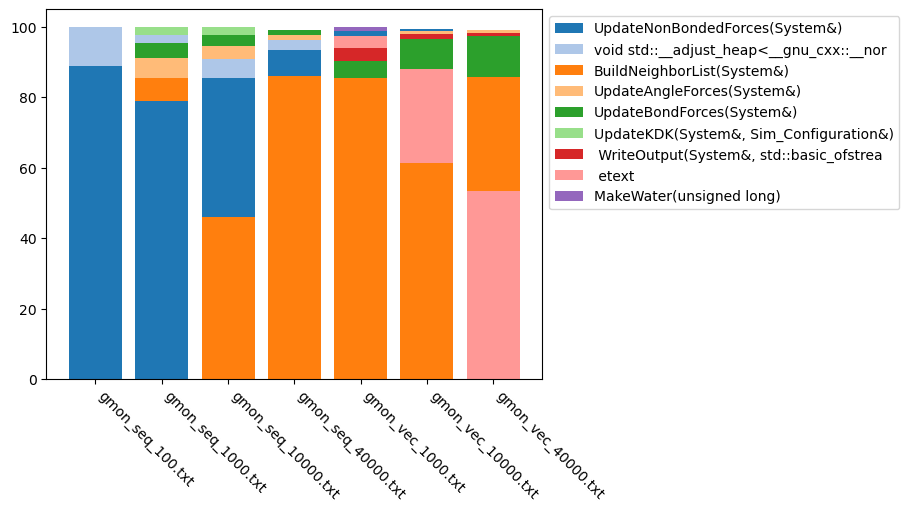

In [205]:
file_dir = os.path.join(repo_dir, '698afdbfe1df1f213974a0ea', 'GMON')
files = [f for f in os.listdir(file_dir) if f.removesuffix('.txt')[-2:] != "10"]

fig, ax = plt.subplots()

color_map = {}  # Dictionary to store unique names and their assigned colors
color_cycle = plt.cm.tab20.colors  # Use a colormap for consistent colors
color_index = 0

for file in files:
    # print(file)
    with open(os.path.join(file_dir, file)) as f:
        read_file = f.read()
    cols = [c for c in read_file.split('\n')[4].split(" ") if c != '']
    cols
    df = pd.DataFrame(columns=cols)

    i = 5
    rows = read_file.split('\n')
    while rows[i] != '':
        function = rows[i].split("  ")[-1]
        values = [float(v) for v in rows[i].split(" ") if v != '' and v.split(".")[0].isdigit()]
        if len(values) != len(cols):
            # print("Error: Length of values does not match length of columns")
            # print(f"Values: {values}")
            # print(f"Columns: {cols}")
            # i += 1
            # continue
            values += [np.nan]*(len(cols)-len(values)-1)
        values.append(function)
        # print(values)

        
        df.loc[len(df)] = values
        i += 1
    # print()

    names = [n[:40] for n in df['name']]

    # plt.plot(names, df['time'])
    mask = df['time'].cumsum() < 99
    mask |= mask.shift(1, fill_value=False)
    # mask = [True] * len(df)  # Include all rows
    bottom = 0
    for height, name in zip(df[mask]["time"], df[mask]["name"]):
        if name not in color_map:
            color_map[name] = color_cycle[color_index % len(color_cycle)]
            color_index += 1
        ax.bar(file, height, label=name[:40], bottom=bottom, color=color_map[name])
        bottom += height

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates in the legend
ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=-45, ha='left')
plt.savefig(os.path.join(repo_dir, "698afdbfe1df1f213974a0ea", "gmon_bar_chart.svg"), bbox_inches='tight')

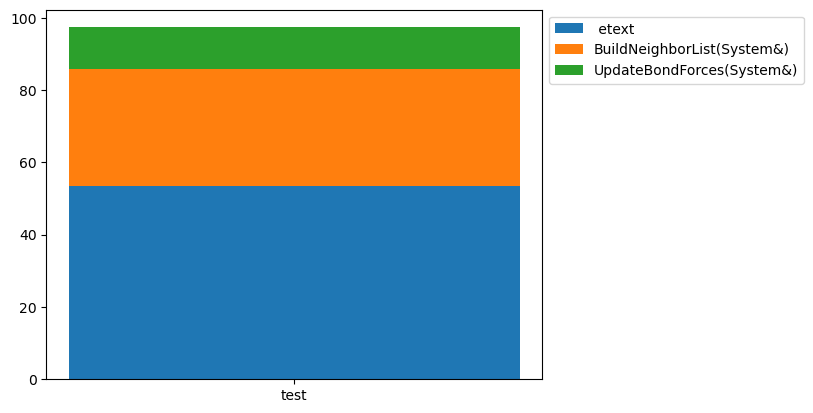

In [183]:
mask = df['time'].cumsum() < 90
mask |= mask.shift(1, fill_value=False)
df[mask]["time"]
fig, ax = plt.subplots()
bottom = 0
for height, name in zip(df[mask]["time"], df[mask]["name"]):
    ax.bar("test", height, label = name[:40], bottom=bottom)
    bottom += height
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [150]:
# asd = [1].append([np.nan]*)
asd = [1]
asd.append(np.nan)
asd

[1, nan]

In [108]:
'11.11'.split(".")[0].isdigit()
[1, 2, 3][2:]

[3]